In [2]:
import pandas as pd
import numpy as np

## Print the first five rows of the training data to view the existing columns from which features can be calculated.
train_df = pd.read_csv('train.csv')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Converting the date object to a date-time object for easier sorting.
train_df['Date'] =pd.to_datetime(train_df.Date)
train_df.sort_values(by=['Date']).head()
# We can see that there are days on which there was no sale. This would not help with the analysis.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


In [4]:
# Counting the number of rows in the training set.
len(train_df)

1017209

In [5]:
# Removing the training data where sales did not take place.
train_df = train_df[train_df.Sales > 0]
len(train_df)

844338

In [6]:
# Calculating the Average sale per customer in the modified trainging set.
train_df['AvgSalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [7]:
# The store gives us more information about the store and granular information about the items on sale.
store_df = pd.read_csv('store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train_merge = pd.merge(train_df, store_df, on='Store')
train_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


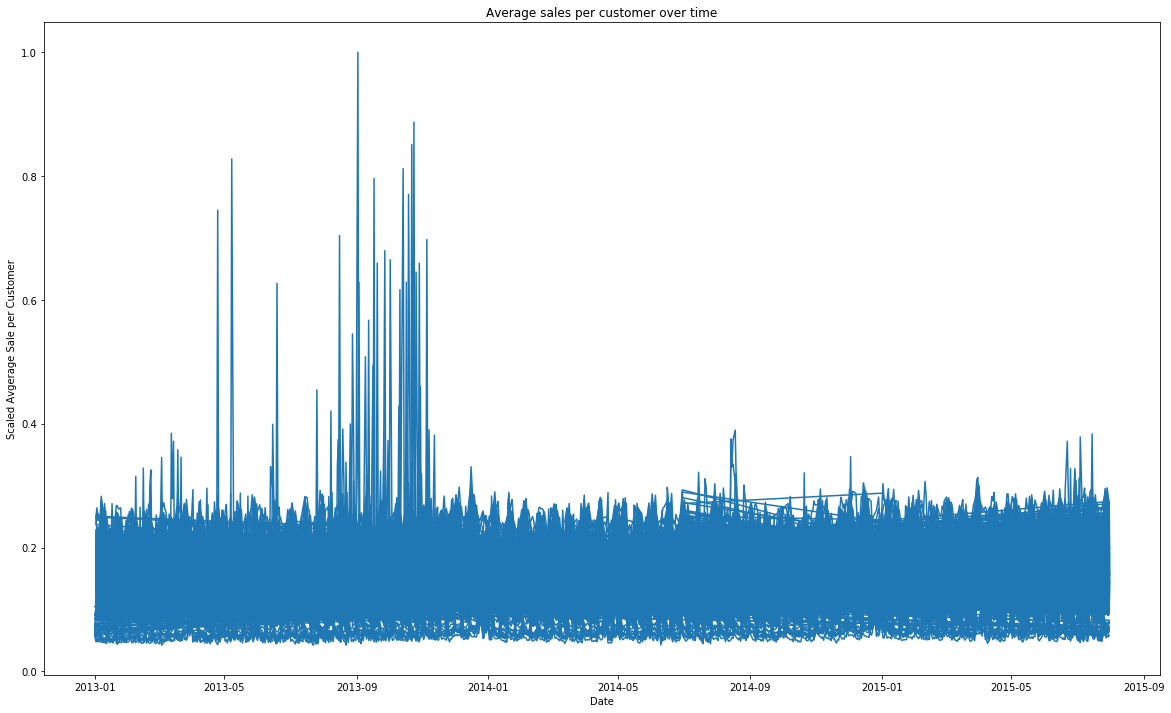

In [9]:
## Plot sale/customer for different dates.
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20,12))
x = train_merge['Date']
y1 = train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer'])
plt.title('Average sales per customer over time')
plt.xlabel('Date')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

In [10]:
## Sales seem to be high during the end of the year. This coukd be because of promotions or holidays.

train_merge['Year'] = pd.DatetimeIndex(train_merge['Date']).year 
train_merge['Month'] = pd.DatetimeIndex(train_merge['Date']).month 

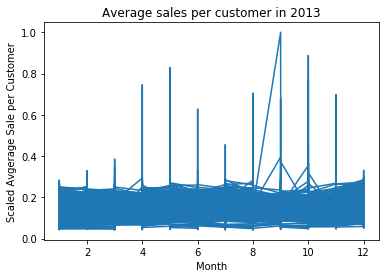

In [11]:
plt.figure()
data_2013 = train_merge[train_merge.Year==2013]
x = data_2013['Month']
y1 = data_2013['AvgSalePerCustomer']/max(data_2013['AvgSalePerCustomer'])
plt.title('Average sales per customer in 2013')
plt.xlabel('Month')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

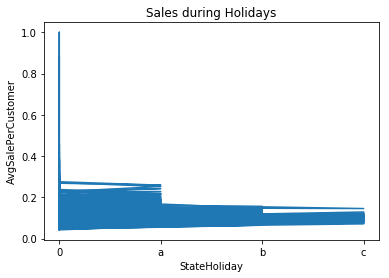

In [13]:
plt.figure()
x = train_merge['StateHoliday']
y1 = train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer'])
plt.title('Sales during Holidays')
plt.xlabel('StateHoliday')
plt.ylabel('AvgSalePerCustomer')
plt.plot(x,y1)
plt.show()

## Since the state holidays do not cause a visible increase in sales, 
## selecting this as a feature would not be recommended.

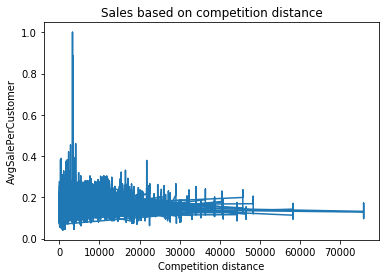

In [14]:
train_merge['CompetitionDistance'].isnull().values.any()
train_merge['CompetitionDistance'].fillna(0, inplace=True)

plt.figure()
plt.plot(train_merge['CompetitionDistance'], train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer']))
plt.title('Sales based on competition distance')
plt.xlabel('Competition distance')
plt.ylabel('AvgSalePerCustomer')
plt.show()

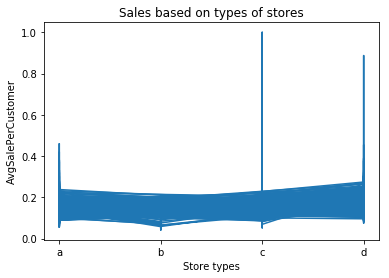

In [15]:
train_merge['StoreType'].isnull().values.any()
train_merge['StoreType'].fillna(0, inplace=True)

plt.figure()
plt.plot(train_merge['StoreType'], train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer']))
plt.title('Sales based on types of stores')
plt.xlabel('Store types')
plt.ylabel('AvgSalePerCustomer')
plt.show()

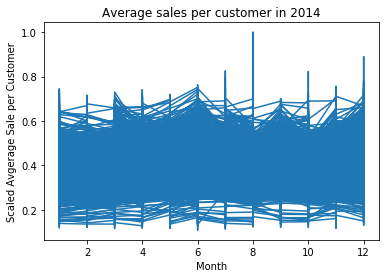

In [82]:
plt.figure()
data_2014 = train_merge[train_merge.Year==2014]
x = data_2014['Month']
y1 = data_2014['AvgSalePerCustomer']/max(data_2014['AvgSalePerCustomer'])
plt.title('Average sales per customer in 2014')
plt.xlabel('Month')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

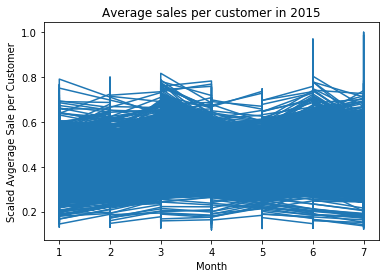

In [83]:
plt.figure()
data_2015 = train_merge[train_merge.Year==2015]
x = data_2015['Month']
y1 = data_2015['AvgSalePerCustomer']/max(data_2015['AvgSalePerCustomer'])
plt.title('Average sales per customer in 2015')
plt.xlabel('Month')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

In [50]:
test_df = pd.read_csv('test.csv')
test_df['Date'] =pd.to_datetime(test_df.Date)
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [52]:
test_merge = pd.merge(test_df, store_df, on='Store')
test_merge.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
